In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from newton_raphson import *

In [2]:
def get_grad_by_difference(symFunc, valueXk, delta):
    fk = symFunc.subs({x1: valueXk[0], x2: valueXk[1]})
    fk_x1 = f.subs({x1: valueXk[0] + delta, x2: valueXk[1]})
    fk_x2 = f.subs({x1: valueXk[0], x2: valueXk[1] + delta})
    grad = np.array([(fk_x1 - fk)/delta, (fk_x2 - fk)/delta])
    return grad

def find_optimal_alpha(symFunc, symVar):
    f_1st_derv = sym.diff(symFunc, symVar)
    f_2nd_derv = sym.diff(f_1st_derv, symVar)

    f_1st_derv = sym.lambdify(alpha, f_1st_derv, 'numpy')
    f_2nd_derv = sym.lambdify(alpha, f_2nd_derv, 'numpy')

    optValue, Iter = newton_raphson(f_1st_derv, f_2nd_derv, 0)
    return optValue, Iter

In [3]:
def plot_contour(symFunc, symX1, symX2, x1Span, x2Span, gridAmount):
    f_func = sym.lambdify((symX1, symX2), symFunc, 'numpy')
    # create mesh grid
    arr_x1 = np.linspace(x1Span[0], x1Span[1], gridAmount)
    arr_x2 = np.linspace(x2Span[0], x2Span[1], gridAmount)
    arr_x1, arr_x2 = np.meshgrid(arr_x1, arr_x2) # create mesh grid
    # contour plot
    plt.contour(arr_x1, arr_x2, f_func(arr_x1, arr_x2))

In [4]:
x1, x2, alpha = sym.symbols('x1 x2 alpha')
f = x1**2 + 10*x2**2
f # display f(x1, x2)

x1**2 + 10*x2**2

In [5]:
maxIter = 100;
delta = 0.00001

x = np.empty(shape=[0, 2])
x = np.append(x, [[9, 5]], axis=0) # initial value
print(f'intial guess x0: {x}')

intial guess x0: [[9. 5.]]


k: 0, x: [8.07384117786756, -0.145329076606107]
k: 1, x: [1.77809424956067, 0.987865176564928]
k: 2, x: [1.59511743393690, -0.0287110308579466]
k: 3, x: [0.351190350026408, 0.195147705605493]
k: 4, x: [0.315051410351897, -0.00566964162707018]
k: 5, x: [0.0692627378497912, 0.0385225950636811]
k: 6, x: [0.0621360177243143, -0.00111712692672289]
k: 7, x: [0.0135595596540697, 0.00757651682150928]
k: 8, x: [0.0121650567107459, -0.000217652537523767]
k: 9, x: [0.00255410646565721, 0.00146170936374751]
k: 10, x: [0.00229209038741118, -3.99922675567281e-5]
k: 11, x: [0.000382261040723465, 0.000250937770953007]
k: 12, x: [0.000343505038246425, -5.19759620120648e-6]
k: 13, x: [-1.84209095651137e-7, -3.24893887297937e-6]
k: 14, x: [7.03993489942836e-7, -1.93613197921670e-8]
k: 15, x: [7.05285788629378e-7, -8.07716802039394e-9]
[7.05285788629378e-7, -8.07716802039394e-9]


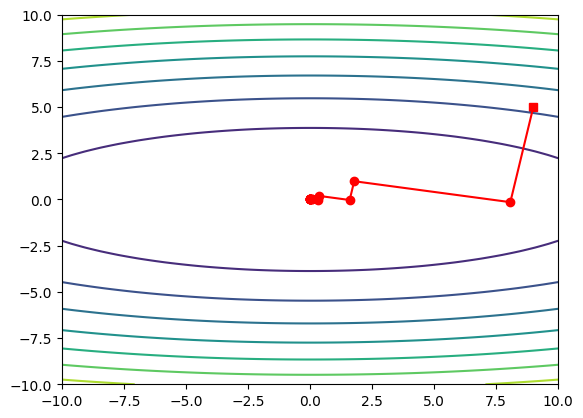

In [6]:
plt.plot(x[0][0],x[0][1], 'rs')
plot_contour(f, x1, x2, [-10, 10], [-10, 10], 101)

# Gradient Descent
for k in range(maxIter):
    # get gradient by finite difference
    grad = get_grad_by_difference(f, x[k], delta)

    # find optimal alpha
    x_alpha = x[k] - alpha*grad
    f_alpha = f.subs({x1: x_alpha[0], x2: x_alpha[1]})
    opt_alpha, Iter = find_optimal_alpha(f_alpha, alpha)
    
    # compute new x
    x_new = [x_alpha[0].subs(alpha, opt_alpha), x_alpha[1].subs(alpha, opt_alpha)]
    # plot latest x and draw a line
    print(f'k: {k}, x: {x_new}')
    plt.plot(x_new[0], x_new[1], 'ro')
    plt.plot([x[k][0], x_new[0]], [x[k][1], x_new[1]], 'r')
    # save new x into array x
    x = np.append(x, [x_new], axis=0)
    # error check
    error = np.linalg.norm(x_new - x[k], 1)
    if error < 1.0e-06:
        print(x_new)
        break